# **Download Data**

In [2]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d naderabdalghani/iam-handwritten-forms-dataset


Dataset URL: https://www.kaggle.com/datasets/naderabdalghani/iam-handwritten-forms-dataset
License(s): unknown
 99% 4.28G/4.31G [00:34<00:00, 147MB/s]
100% 4.31G/4.31G [00:34<00:00, 134MB/s]


In [4]:
!unzip iam-handwritten-forms-dataset.zip -d iam_dataset


Archive:  iam-handwritten-forms-dataset.zip
  inflating: iam_dataset/__notebook_source__.ipynb  
  inflating: iam_dataset/data/000/a01-000u.png  
  inflating: iam_dataset/data/000/a01-003u.png  
  inflating: iam_dataset/data/000/a01-007u.png  
  inflating: iam_dataset/data/000/a01-011u.png  
  inflating: iam_dataset/data/000/a01-014u.png  
  inflating: iam_dataset/data/000/a01-020u.png  
  inflating: iam_dataset/data/000/a01-026u.png  
  inflating: iam_dataset/data/000/a01-030u.png  
  inflating: iam_dataset/data/000/a01-043u.png  
  inflating: iam_dataset/data/000/a01-049u.png  
  inflating: iam_dataset/data/000/a01-049x.png  
  inflating: iam_dataset/data/000/a01-053u.png  
  inflating: iam_dataset/data/000/a01-058u.png  
  inflating: iam_dataset/data/000/a01-063u.png  
  inflating: iam_dataset/data/000/a01-068u.png  
  inflating: iam_dataset/data/000/a01-072u.png  
  inflating: iam_dataset/data/000/a01-077u.png  
  inflating: iam_dataset/data/000/a01-082u.png  
  inflating: iam_data

In [5]:
!pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 28.5 MB/s eta 0:00:00


In [6]:
import glob
import cv2
import matplotlib.pyplot as plt
import random

# **Preprocessing Data**

images split as digital part and handwriting part

In [7]:
images = sorted(glob.glob('iam_dataset/data/*/*.png'))

In [8]:
len(images)

1539

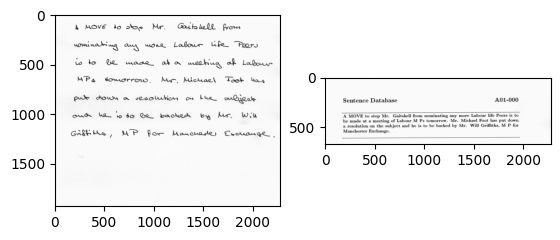

In [9]:
def crop_and_split(img):
    if isinstance(img, str):
        img = cv2.imread(img)
        assert img is not None

    img = img[:, 200:]

    prt = img[:670]
    hand = img[670:2600]
    return hand, prt

img = images[0]
hand, prt = crop_and_split(img)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(hand)
ax2.imshow(prt)
plt.show()
plt.close()

In [10]:
def save_cropped_images(original_image_path, output_hand_dir, output_prt_dir):

    base_name = os.path.splitext(os.path.basename(original_image_path))[0]
    hand_img_array, prt_img_array = crop_and_split(original_image_path)

    hand_output_path = os.path.join(output_hand_dir, f"{base_name}_hand.png")
    prt_output_path = os.path.join(output_prt_dir, f"{base_name}_prt.png")
    cv2.imwrite(hand_output_path, hand_img_array)
    cv2.imwrite(prt_output_path, prt_img_array)


In [11]:
import cv2
import matplotlib.pyplot as plt

handw ="/content/handw"
prt = "/content/prt"


'''for img_path in images:
    save_cropped_images(img_path,handw,prt)'''

save_cropped_images(images[102],handw,prt)

# **Transformers**

In [12]:
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 148.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.56.2
    Uninstalling transformers-4.56.2:
      Successfully uninstalled transformers-4.56.2


In [13]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch_xla/experimental/gru.py:113: SyntaxWarning: invalid escape sequence '\_'
  * **h_n**: tensor of shape :math:`(D * \text{num\_layers}, H_{out})` or


In [14]:
model_name = "microsoft/trocr-base-handwritten"

processor = TrOCRProcessor.from_pretrained(model_name)
model = VisionEncoderDecoderModel.from_pretrained(model_name)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:86: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# **Cropped Lines**

In [28]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def trim_line_edges(line_img, pad=2, smooth_window=5, rel_thresh=0.02, min_width=5, verbose=False):

    if isinstance(line_img, Image.Image):
        arr = np.array(line_img)
    else:
        arr = line_img

    if arr.dtype != np.uint8:
        if np.issubdtype(arr.dtype, np.floating):
            arr = (np.clip(arr, 0.0, 1.0) * 255).astype(np.uint8)
        else:
            arr = arr.astype(np.uint8)

    # 3) color -> gray
    if arr.ndim == 3:
        gray = cv2.cvtColor(arr, cv2.COLOR_BGR2GRAY)

        if gray.mean() > 250 and arr.shape[2] >= 3:
            gray = cv2.cvtColor(arr, cv2.COLOR_RGB2GRAY)
    else:
        gray = arr.copy()

    h, w = gray.shape

    try:
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    except Exception:
        thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY_INV, 11, 2)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
    clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    col_sum = np.sum(clean, axis=0).astype(np.float32)

    if smooth_window and smooth_window > 1:
        k = np.ones(smooth_window, dtype=np.float32) / smooth_window
        col_sum_smooth = np.convolve(col_sum, k, mode='same')
    else:
        col_sum_smooth = col_sum

    max_val = col_sum_smooth.max() if col_sum_smooth.size else 0.0

    if max_val > 0:
        thresh_val = max(1.0, rel_thresh * max_val)
        mask = col_sum_smooth >= thresh_val
    else:
        mask = col_sum_smooth > 0

    if verbose:
        print("trim_line_edges: width", w, "max_col_sum", max_val, "thresh_val", (thresh_val if max_val>0 else 0))

    if not np.any(mask):
        coords = cv2.findNonZero(clean)
        if coords is not None:
            bx, by, bw, bh = cv2.boundingRect(coords)
            left = bx
            right = bx + bw - 1
        else:
            if verbose: print("No text detected in line -> returning original")
            return gray
    else:
        left = int(np.argmax(mask))
        right = int(len(mask) - 1 - np.argmax(mask[::-1]))

    left = max(0, left - pad)
    right = min(w - 1, right + pad)

    if right - left + 1 < min_width:
        if verbose: print("Cropped width too small -> returning original")
        return gray

    cropped = gray[:, left:right+1]

    if verbose:
        print("Cropped from", (0, w-1), "to", (left, right), "-> new width", cropped.shape[1])
        plt.figure(figsize=(12,3))
        plt.subplot(1,3,1); plt.imshow(gray, cmap='gray'); plt.title('orig gray'); plt.axis('off')
        plt.subplot(1,3,2); plt.imshow(clean, cmap='gray'); plt.title('thresh cleaned'); plt.axis('off')
        plt.subplot(1,3,3); plt.imshow(cropped, cmap='gray'); plt.title('cropped'); plt.axis('off')
        plt.show()

    return cropped


In [36]:
def segment_lines(img, debug=False,
                  min_line_height=8,
                  min_gap=8,
                  smooth_window=5,
                  pad_horiz=2,
                  pad_vert=2):

    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img.copy()

    h_img, w_img = gray.shape

    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    hist = np.sum(thresh, axis=1)

    hist_mask = hist > 0

    starts = []
    ends = []
    in_line = False
    for i, v in enumerate(hist_mask):
        if v and not in_line:
            in_line = True
            start = i
        if (not v) and in_line:
            in_line = False
            end = i
            if end - start >= min_line_height:
                starts.append(start)
                ends.append(end)
    if in_line:
        end = len(hist_mask)
        if end - start >= min_line_height:
            starts.append(start); ends.append(end)

    merged = []
    if starts:
        cur_s, cur_e = starts[0], ends[0]
        for s, e in zip(starts[1:], ends[1:]):
            if s - cur_e <= min_gap:
                cur_e = e
            else:
                merged.append((cur_s, cur_e))
                cur_s, cur_e = s, e
        merged.append((cur_s, cur_e))
    else:
        merged = []

    line_images = []
    for (y1, y2) in merged:
        yy1 = max(0, y1 - pad_vert)
        yy2 = min(h_img, y2 + pad_vert)
        line = gray[yy1:yy2, :]
        thresh_line = thresh[yy1:yy2, :]

        col_sum = np.sum(thresh_line, axis=0).astype(np.float32)

        if smooth_window > 1:
            k = np.ones(smooth_window) / smooth_window
            col_sum_smooth = np.convolve(col_sum, k, mode='same')
        else:
            col_sum_smooth = col_sum

        eps_thresh = 1
        thresh_mask = col_sum_smooth > eps_thresh

        tight = trim_line_edges(line, pad=2, smooth_window=7, rel_thresh=0.02, min_width=5, verbose=False)

        line_images.append(tight)

    if debug:
        fig, axs = plt.subplots(2, 1, figsize=(12, 8))
        axs[0].imshow(gray, cmap='gray')
        for (y1, y2) in merged:
            axs[0].axhline(y=y1, color='r')
            axs[0].axhline(y=y2, color='r')
        axs[0].set_title("Line (red)")

        axs[1].plot(hist, label='horiz_proj')
        axs[1].set_title("Horizontal Projection (hist)")
        axs[1].legend()
        plt.show()

        for i, li in enumerate(line_images):
            plt.figure(figsize=(10,2))
            plt.imshow(li, cmap='gray')
            plt.title(f"Line {i} (shape={li.shape})")
            plt.axis('off')
            plt.show()

    return line_images


In [37]:
def detect_lines(img_path):
  img = cv2.imread(img_path)
  lines = segment_lines(img, debug=True)
  print(f"{len(lines)} Lines detected.")
  return lines

In [38]:
import io
decoded = []

def decode_image(img):
    img = cv2.imread(img)
    lines = segment_lines(img, debug=False)
    print(f"{len(lines)} Lines detected.")
    for i in lines:
      pil_img = Image.fromarray(i)
      buffer = io.BytesIO()
      pil_img.save(buffer, format="PNG")
      buffer.seek(0)
      pil_png = Image.open(buffer).convert("RGB")
      pixel_values = processor(images=pil_png, return_tensors="pt").pixel_values
      generated_ids = model.generate(pixel_values)
      generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
      decoded.append(generated_text)
    return decoded


[[251 251 251 ... 251 251 251]
 [251 249 251 ... 249 251 251]
 [251 251 251 ... 251 251 251]
 ...
 [247 249 251 ... 242 250 251]
 [247 251 251 ... 246 251 251]
 [250 251 251 ... 251 251 251]]
[[251 251 249 ... 251 251 250]
 [251 251 248 ... 250 245 246]
 [250 251 251 ... 251 247 248]
 ...
 [250 250 251 ... 250 249 246]
 [248 250 251 ... 251 250 249]
 [251 249 250 ... 249 251 245]]
[[251 251 251 ... 248 250 250]
 [251 251 251 ... 244 246 248]
 [250 251 251 ... 246 246 250]
 ...
 [251 250 250 ... 251 251 251]
 [251 250 250 ... 251 251 251]
 [251 251 251 ... 249 251 251]]
[[248 250 251 ... 251 251 250]
 [251 251 251 ... 251 250 250]
 [251 251 247 ... 248 248 245]
 ...
 [250 250 251 ... 244 249 249]
 [249 250 251 ... 250 251 250]
 [251 251 250 ... 251 250 249]]
[[243 246 249 ... 249 251 250]
 [246 247 248 ... 239 246 250]
 [248 247 245 ... 245 245 250]
 ...
 [251 249 248 ... 249 246 244]
 [251 247 245 ... 249 249 250]
 [248 248 245 ... 250 250 250]]
[[243 243 241 ... 251 251 250]
 [243 244

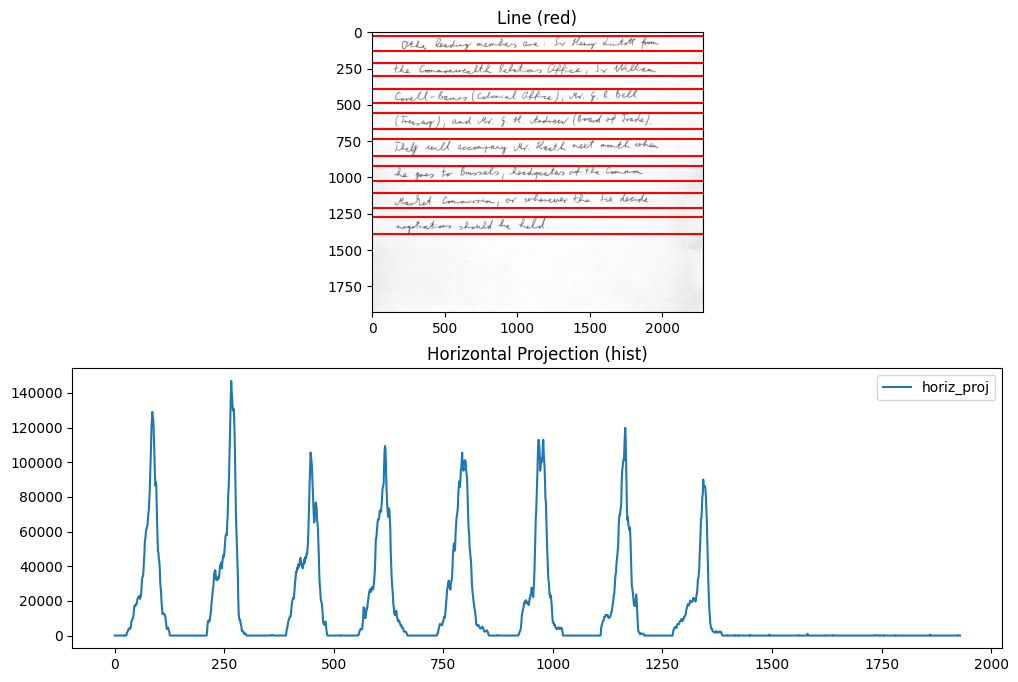

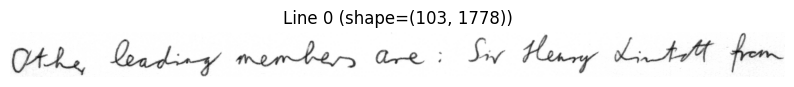

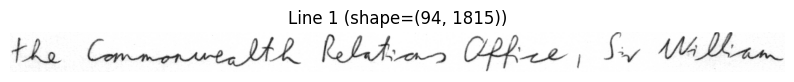

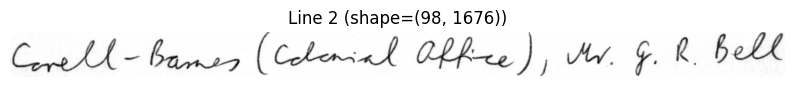

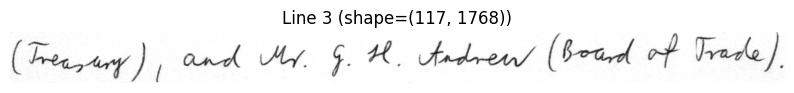

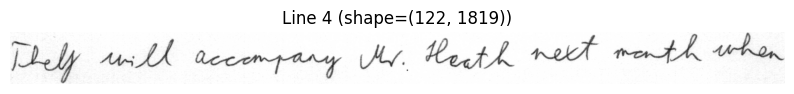

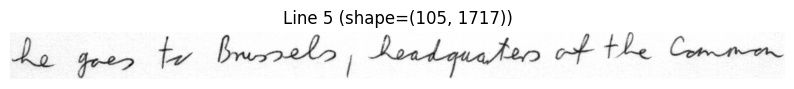

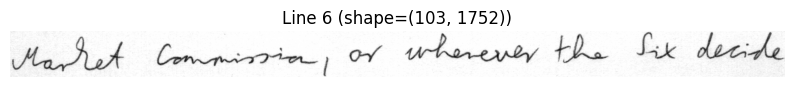

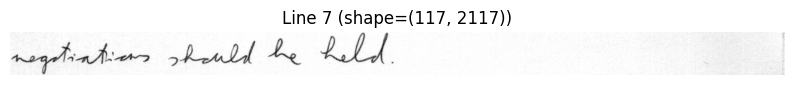

8 Lines detected.


[array([[251, 251, 251, ..., 251, 251, 251],
        [251, 249, 251, ..., 249, 251, 251],
        [251, 251, 251, ..., 251, 251, 251],
        ...,
        [247, 249, 251, ..., 242, 250, 251],
        [247, 251, 251, ..., 246, 251, 251],
        [250, 251, 251, ..., 251, 251, 251]], dtype=uint8),
 array([[251, 251, 249, ..., 251, 251, 250],
        [251, 251, 248, ..., 250, 245, 246],
        [250, 251, 251, ..., 251, 247, 248],
        ...,
        [250, 250, 251, ..., 250, 249, 246],
        [248, 250, 251, ..., 251, 250, 249],
        [251, 249, 250, ..., 249, 251, 245]], dtype=uint8),
 array([[251, 251, 251, ..., 248, 250, 250],
        [251, 251, 251, ..., 244, 246, 248],
        [250, 251, 251, ..., 246, 246, 250],
        ...,
        [251, 250, 250, ..., 251, 251, 251],
        [251, 250, 250, ..., 251, 251, 251],
        [251, 251, 251, ..., 249, 251, 251]], dtype=uint8),
 array([[248, 250, 251, ..., 251, 251, 250],
        [251, 251, 251, ..., 251, 250, 250],
        [251, 25

In [40]:
detect_lines("/content/handw/a02-017_hand.png")

In [32]:
!pip install pytesseract

In [33]:
import pytesseract
from PIL import Image

def ocr(img_path):
  image = Image.open(img_path)
  text = pytesseract.image_to_string(image, lang="eng")
  return text

In [34]:
from pathlib import Path

handw_folder_path = Path("/content/handw")
prt_folder_path = Path("/content/prt")

for handw_file_path, prt_file_path in zip(handw_folder_path.iterdir(), prt_folder_path.iterdir()):

    decode_image(handw_file_path)

    pred = ""
    for i in decoded:
      pred = pred + i

    print(pred)
    decoded.clear()

    ocr_result = ocr(prt_file_path)

    print(ocr_result)

8 Lines detected.
Other leading members are : Sir Henry Lintott fromthe Commonwealth Relations Office , Sir WilliamCorell-Barnes ( Colonial Office ) , Mr. G. R. Bell( Treasury ) , and Mr. G. H. Andrew ( Board of Trade ) .They will accompany Mr. Heath next month whenhe goes to Brussels , headquarters of the CommonMarket Commission , or whenever the Six decidenegotiations should be held .000000000
Sentence Database A02-017

Other leading members are: Sir Henry Lintott from the Commonwealth Relations
Office, Sir William Corell-Barnes (Colonial Office), Mr. G. R. Bell (Treasury), and Mr.
G. H. Andrew (Board of Trade). They will accompany Mr. Heath next month when
he goes to Brussels, headquarters of the Common Market Commission, or wherever
the Six decide negotiations should be held.

 



# **Levenshtein Score**

In [26]:
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 73.1 MB/s eta 0:00:00


In [41]:
import Levenshtein

predicted = pred
ground_truth = ocr_result

distance = Levenshtein.distance(predicted, ground_truth)
similarity = Levenshtein.ratio(predicted, ground_truth)

print("Levenshtein distance:", distance)
print("Similarity:", similarity)

Levenshtein distance: 61
Similarity: 0.9097938144329897
